In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(r"C:\Users\ANAND\Documents\GitHub\A-study-on-awareness-and-perceptionn-among-the-users-of-EVs\responces.csv")
df = df.drop(columns='Name', axis=1)
df.head()

,Gender,Age,Employment Status,Education Qualification,District,Area of Residence,which type of Vehicle do you have?,Do you have an Electric Vehicle?,1.1 Are electric vehicles better performing compared to fuel vehicles?,1.2 Are electric vehicles easy to drive then fuel vehicles?,...,4.5 How is the resale value of an EV's compared to a traditional fuel vehicles?,5.1 How familiar are you with EV’s and their features?,5.2 Are you attracted to EV’s because of the technological advancement?,5.3 Are you satisfied with the range of EV’s comparing to traditional fuel vehicles?,"5.4 If you were to buy a vehicle, would you consider EV’s?",5.5 What do you think of the government encouraging e-vehicle sales?,6.1 Are electric vehicles polluting like other traditional fuel vehicles?,"6.2 What is your opinion about that the absents of tailpipe emissions from EV’s contributes to better air quality, reducing pollutants that can have adverse effects on human health and the environment?","6.3 Because electric vehicles are soundless than traditional vehicles, do they reduce noise pollution especially in public spaces?",6.4 Are the applications of EV’s support to eco- friendly transportation?
0,Female,18 - 27,Student,Post Graduate,Coimbatore,Urban,Petrol,No,fair,neutral,...,High,familiar,Attracted,Very satisfied,Somewhat considered,Good,Similar to others,Neutral,Reduce,neutral
1,Male,18 - 27,Student,Post Graduate,coimbatore,Rural,Diesel,Yes,good,neutral,...,Low,Very unfamiliar,Highly not attracted,moderately satisfied,Somewhat considered,Average,Highly polluting,Useless,Didn't reduce,support
2,Male,18 - 27,Student,Post Graduate,coimbatore,Rural,Petrol,Yes,poor,very easy,...,Very low,familiar,Not attracted,Very satisfied,Somewhat considered,Fair,Not polluting,Usefull,Definitely reduce,definitely support
3,Male,18 - 27,Student,Post Graduate,Viruthunagar,Urban,Diesel,Yes,very poor,very hard,...,Neutral,Somewhat familiar,Highly not attracted,moderately satisfied,Not considered,Fair,Similar to others,Usefull,Reduce,neutral
4,Female,18 - 27,Student,Post Graduate,Dharmapuri,Urban,Petrol,No,good,neutral,...,High,familiar,Not attracted,Slightly satisfied,Somewhat considered,Fair,slightly polluting,Neutral,Reduce,neutral


In [29]:
scaler = OneHotEncoder()
df_enc = scaler.fit_transform(df)
print(df_enc)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7035 stored elements and shape (201, 212)>
  Coords	Values
  (0, 0)	1.0
  (0, 2)	1.0
  (0, 7)	1.0
  (0, 12)	1.0
  (0, 19)	1.0
  (0, 70)	1.0
  (0, 74)	1.0
  (0, 75)	1.0
  (0, 77)	1.0
  (0, 84)	1.0
  (0, 89)	1.0
  (0, 93)	1.0
  (0, 98)	1.0
  (0, 103)	1.0
  (0, 109)	1.0
  (0, 113)	1.0
  (0, 119)	1.0
  (0, 122)	1.0
  (0, 127)	1.0
  (0, 135)	1.0
  (0, 138)	1.0
  (0, 143)	1.0
  (0, 149)	1.0
  (0, 152)	1.0
  (0, 161)	1.0
  :	:
  (200, 91)	1.0
  (200, 93)	1.0
  (200, 99)	1.0
  (200, 106)	1.0
  (200, 109)	1.0
  (200, 113)	1.0
  (200, 117)	1.0
  (200, 124)	1.0
  (200, 131)	1.0
  (200, 135)	1.0
  (200, 138)	1.0
  (200, 145)	1.0
  (200, 148)	1.0
  (200, 153)	1.0
  (200, 157)	1.0
  (200, 166)	1.0
  (200, 168)	1.0
  (200, 175)	1.0
  (200, 178)	1.0
  (200, 185)	1.0
  (200, 191)	1.0
  (200, 194)	1.0
  (200, 198)	1.0
  (200, 205)	1.0
  (200, 209)	1.0


In [50]:
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(df_enc)
X_scaled

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7035 stored elements and shape (201, 212)>

(201, 3)


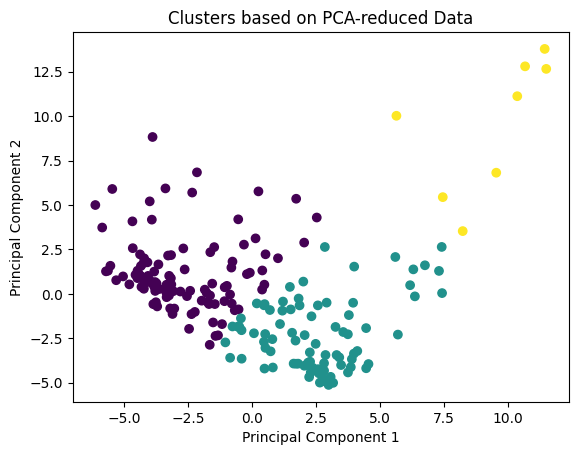

In [88]:
# Apply PCA to reduce the dataset to 1 component
pca1 = PCA(n_components=3)
X_pca1 = pca1.fit_transform(X_scaled)

# The dataset is now reduced to 1-dimensional data
print(X_pca1.shape)  # Should show (number_of_samples, 1)




# Scatter plot of the data using the first two principal components
plt.scatter(X_pca1[:, 0], X_pca1[:, 1], c=labels, cmap='viridis')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters based on PCA-reduced Data')
plt.show()


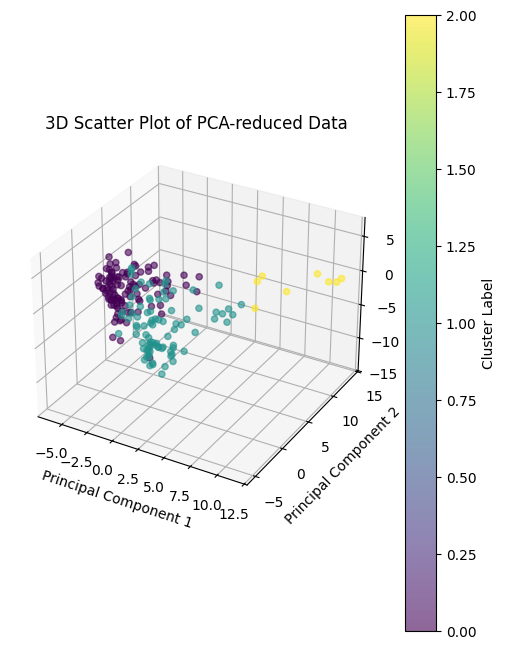

In [90]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_pca1[:, 0], X_pca1[:, 1], X_pca1[:, 2], c=labels, cmap='viridis', alpha=0.6)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of PCA-reduced Data')

# Optional: Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')  # Optional: Show color mapping to labels

plt.show()


(201, 2)


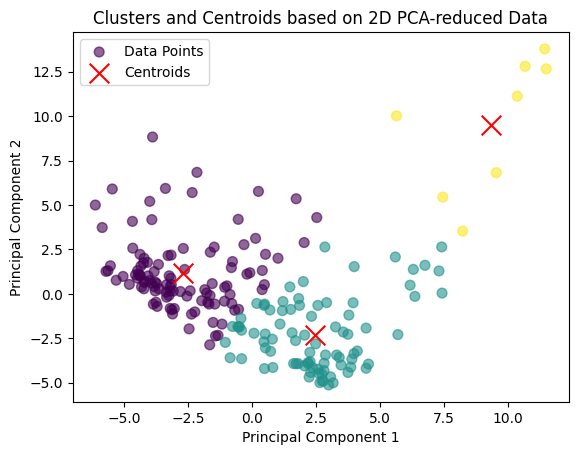

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming X_scaled is your scaled data
# Apply PCA to reduce the dataset to 2 components
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

# The dataset is now reduced to 2-dimensional data
print(X_pca2.shape)  # Should show (number_of_samples, 2)

# Perform K-Means clustering on the 2D PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca2)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_  # These centroids are now in the 2D PCA space

# Scatter plot of the data using the first two principal components
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, label='Data Points')

# Plot the centroids in the 2D space
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters and Centroids based on 2D PCA-reduced Data')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [86]:

np.unique(labels)
labels_series = pd.Series(labels)
labels_series.value_counts()

0    107
1     86
2      8
Name: count, dtype: int64

In [45]:
#pca = PCA()
#x_pca = pca.fit(x_scaled)
# Explained variance for each component
#explained_variance = pca.explained_variance_ratio_
#cumulative_variance = np.cumsum(explained_variance)
# Find the number of components needed to capture 90% of the variance
#n_components = np.argmax(cumulative_variance >= 0.90) + 1
#print(f"Number of components needed to retain 90% variance: {n_components}")


Number of components needed to retain 90% variance: 84


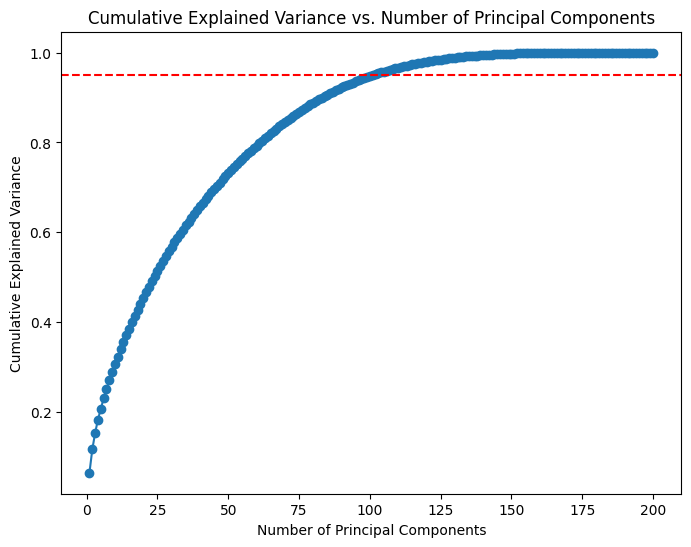

Number of components needed to retain 95% of the variance: 102


In [44]:
#pca1 = PCA(n_components=10)
#X_pca = pca1.fit_transform(x_scaled)

# Explained variance for each component
#explained_variance1 = pca1.explained_variance_ratio_

# Cumulative explained variance
#cumulative_variance = np.cumsum(explained_variance)

# Plotting the cumulative explained variance
#plt.figure(figsize=(8, 6))
#plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
#plt.axhline(y=0.95, color='r', linestyle='--')  # Line showing 95% threshold
#plt.xlabel('Number of Principal Components')
#plt.ylabel('Cumulative Explained Variance')
#plt.title('Cumulative Explained Variance vs. Number of Principal Components')
#plt.show()

# Find the number of components needed for 95% variance
#n_components = np.argmax(cumulative_variance >= 0.95) + 1
#print(f"Number of components needed to retain 95% of the variance: {n_components}")

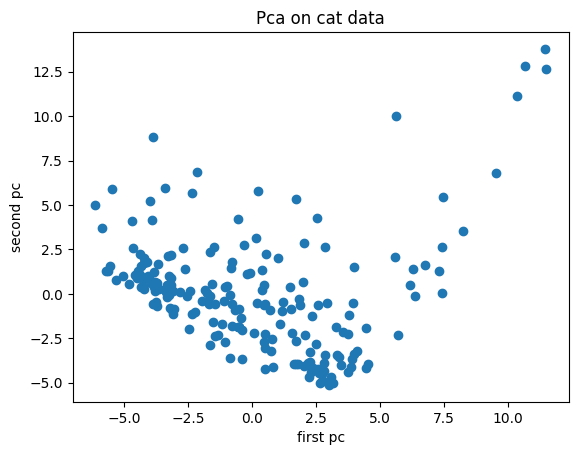

In [37]:
#plt.scatter(x_pca[:,0],x_pca[:,1])
#plt.xlabel("first pc")
#plt.ylabel("second pc")
#plt.title("Pca on cat data")
#plt.show()